In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

%matplotlib inline 

In [6]:
tasks = pd.read_excel('tasks.xlsx')
tasks

,Cluster,Severity,ETA (days),Task
0,GP1,red,30,add new nodes
1,GP2,red,30,add new nodes
2,PEC1,yellow,5,upgrade cluster to 8.0.0.4 + patches
3,PEC2,yellow,22,upgrade cluster to 8.0.0.4 + patches


In [7]:
tasks = pd.read_excel('tasks.xlsx')


final_df = pd.DataFrame()
clusters = ['GP1','GP2','PEC1','PEC2','RESEARCH','SPLUNK']
#clusters = ['PEC1']
print(tasks)
print("------------------------")

tasks.drop(['Task'],axis=1,inplace=True)

for cluster in clusters:
  
    
    # if cluster is not in list all green
    if cluster not in tasks['Cluster'].tolist():
        #np.max(tasks['ETA (days)'])
        green= pd.Series({'Cluster':cluster,
                          'Severity':'green',
                          'ETA (days)':tasks['ETA (days)'].max()})
      
        final_df = final_df.append(green,ignore_index=True)
        
    else:
    
        cluster_df = tasks[tasks['Cluster'] == cluster]

        ## account for ties
        cluster_entries = cluster_df[cluster_df['Cluster'] == cluster]
        max_entry_row = cluster_entries.loc[cluster_entries['ETA (days)'].argmax()]
        max_color = max_entry_row['Severity']
        
        #print(max_entry_row.tolist())
       
       
        #print(max_entry)
        if (max_color == 'red'):
            # add red
            final_df = final_df.append(max_entry_row,ignore_index=True)

        elif (max_color == 'yellow'):
            # add red
            red = cluster_df[(cluster_df["Cluster"]==cluster) & (cluster_df["Severity"]=='red')]
            #print(final_df)
            final_df = final_df.append(red,ignore_index=True)
            # add yellow
            final_df = final_df.append(max_entry_row,ignore_index=True)
            #print(final_df)

        elif (max_color == 'blue'):
            
            # add red
            red = cluster_df[(cluster_df["Cluster"]==cluster) & (cluster_df["Severity"]=='red')]
            final_df = final_df.append(red,ignore_index=True)
            #print(final_df)
            #print('blue')
            #print(final_df)
            # add red
            yellow = cluster_df[(cluster_df["Cluster"]==cluster) & (cluster_df["Severity"]=='yellow')]
            final_df = final_df.append(yellow,ignore_index=True)
            #print(final_df)
            # add blue
            #print(final_df)
            #print(max_entry_row)
            final_df = final_df.append(max_entry_row,ignore_index=True)
            #print(final_df)
            
#print('----------')
#print(final_df)

## ADD green entries
no_green  = [x for x in clusters if x not in final_df[final_df['Severity']=='green']['Cluster'].tolist()]
#print(final_df[final_df['Severity']=='green'])
#print(no_green)

for cluster in no_green:
    
    green= pd.Series({'Cluster':cluster,
                      'Severity':'green',
                      'ETA (days)':tasks['ETA (days)'].max()})

    final_df = final_df.append(green,ignore_index=True)

    
    
final_df.sort_values('Cluster',inplace=True)


## ADD all other entries with 0 ETA (blue, yellow, red)

no_blue  = [x for x in clusters if x not in final_df[final_df['Severity']=='blue']['Cluster'].tolist()] 
no_yellow  = [x for x in clusters if x not in final_df[final_df['Severity']=='yellow']['Cluster'].tolist()]
no_red  = [x for x in clusters if x not in final_df[final_df['Severity']=='red']['Cluster'].tolist()]

#print('no red')


for cluster in no_blue:  
    #print(cluster)
    blue= pd.Series({'Cluster':cluster,
                      'Severity':'blue',
                      'ETA (days)':0})
    final_df = final_df.append(blue,ignore_index=True)
for cluster in no_yellow:    
    yellow= pd.Series({'Cluster':cluster,
                      'Severity':'yellow',
                      'ETA (days)':0})
    final_df = final_df.append(yellow,ignore_index=True)
for cluster in no_red:    
    red= pd.Series({'Cluster':cluster,
                      'Severity':'red',
                      'ETA (days)':0})
    final_df = final_df.append(red,ignore_index=True)
    
final_df.sort_values(['Cluster','Severity'],inplace=True)

final_df

  Cluster Severity  ETA (days)                                  Task
0     GP1      red          30                         add new nodes
1     GP2      red          30                         add new nodes
2    PEC1   yellow           5  upgrade cluster to 8.0.0.4 + patches
3    PEC2   yellow          22  upgrade cluster to 8.0.0.4 + patches
------------------------


,Cluster,ETA (days),Severity
10,GP1,0.0,blue
1,GP1,30.0,green
0,GP1,30.0,red
16,GP1,0.0,yellow
11,GP2,0.0,blue
3,GP2,30.0,green
2,GP2,30.0,red
17,GP2,0.0,yellow
12,PEC1,0.0,blue
5,PEC1,30.0,green


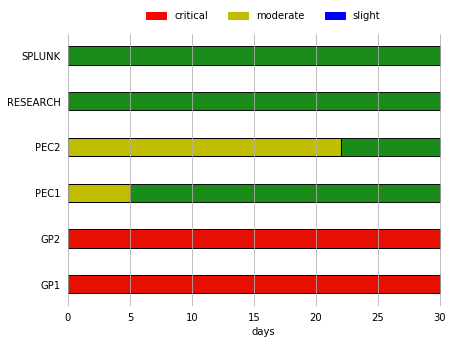

In [12]:


fig, ax = plt.subplots(figsize=(7,5))

greens = final_df[final_df['Severity']=='green']
blues = final_df[final_df['Severity']=='blue']
yellows = final_df[final_df['Severity']=='yellow']
reds = final_df[final_df['Severity']=='red']


green = ax.barh(np.arange(len(clusters)),greens['ETA (days)'],color='g',align='center',height=0.4,edgecolor='black',alpha=0.9)
blue = ax.barh(np.arange(len(clusters)),blues['ETA (days)'],color='b',align='center',height=0.4,edgecolor='black',alpha=0.9)
yellow = ax.barh(np.arange(len(clusters)),yellows['ETA (days)'],color='y',align='center',height=0.4,edgecolor='black',alpha=1)
red = ax.barh(np.arange(len(clusters)),reds['ETA (days)'],color='r',align='center',height=0.4,edgecolor='black',alpha=0.9)


ax.set_yticklabels(['']  + clusters)
ax.set_xlabel('days')
ax.xaxis.grid(True)

#legend
red_patch = mpatches.Patch(color='r',
                           label='critical')
yellow_patch = mpatches.Patch(color='y',
                              label='moderate')
blue_patch = mpatches.Patch(color='b',
                            label='slight')


ax.legend(handles=[red_patch,
                        yellow_patch,
                        blue_patch],bbox_to_anchor=(0.50, 1.1), loc='upper center', borderaxespad=0.,ncol=3,frameon=False)
 

ax.tick_params(bottom="off", top="off", left="off", right="off")
for key,spine in ax.spines.items():
        spine.set_visible(False)


fig.savefig('risk.png')

plt.show()


In [5]:
tasks

,Cluster,Severity,ETA (days)
0,GP1,red,30
1,GP2,red,30
2,PEC1,yellow,5
3,PEC1,blue,10
4,PEC2,yellow,22
5,PEC2,blue,10
